[链表](data_structure/linked_list.md)  

链表相关的核心点  
- null/nil 异常处理, 访问 X.next 、X.value,否则就报错
- dummy node 哑巴节点, 就看看头节点是否被删除
- 快慢指针
- 插入一个节点到排序链表
- 从一个链表中移除一个节点, 典型题：删除排序链表中的重复元素1,2
- 翻转链表, 整体翻转，局部翻转，两道题，用迭代法
- 合并两个链表, 合并后有序
- 找到链表的中间节点


一共12个题

peek 这个单词在英语里意思是 偷看、瞥一眼。  
在编程里常常表示 “先看一下下一个元素” 的动作。  
👉peek  “探查指针 / 窥视指针”，即负责往前探查链表节点的变量。  
tricky 棘手的

dummy peek duplicate  

In [1]:
class ListNode:
    def __init__(self,val=0,next= None):
        self.val = val
        self.next = next
node1 = ListNode(val = 5)
node1.val, node1.next

(5, None)

In [ ]:
def remove_duplicate():
    if root is None:
        return None

    dummy = ListNote(next = head)
    
    current, peek = dummy, head
    find_duplicate = False
    while peek.next is not None:
        if peek.next.val == peek.val:
            find_duplicate = True
            peek.next = peek.next.next
        else:
            if find_duplicate:
                find_duplicate = False
                current.next = peek.next
            else:
                current = current.next
            peek = current.next
    if find_duplicate:
        current.next = current.next.next
        
    return dummy.next
            


In [4]:
def reverseList(head):
    if head is None:
        return None
    
    tail = head
    while tail.next is not None:
        temp = tail.next
        tail.next = temp.next
        temp.next = head
        head = temp
    
    return head
        

In [3]:
def reverseBetween(head):
    if head is  None:
        return None
    n -= m
    current = dummy = ListNode(next=head)
    while  m > 1:
        current = current.next
        m-=1
    start = current.next
    while n > 0:
        temp = start.next
        start.next = temp.next
        temp.next = current.next
        current.next = temp
        n-=1
        
    return dummy.next

In [7]:
nums1: list[int] = [1, 2, 3]
nums2: list[int] = [6, 8, 7, 10, 9]
nums2.sort()

In [8]:
nums2

[6, 7, 8, 9, 10]

In [ ]:
def mergeTwoLists(list1, list2):
    
    tail = dummy = ListNode()
    while list1 is not None and list2 is not None:
        if list1.val < list2.val:
            tail.next = list1
            list1 = list1.next
        else:
            tail.next = list2
            list2 = list2.next
            
        tail = tail.next
    tail.next = list2 if list1 is None else list1
    
    return dummy.next



In [ ]:
def partition(head,x=3):
    
    tail = dummy = ListNode()
    old_tail = old_dummy = ListNode(next = head)
    while old_tail.next is not None:
        if old_tail.next.val < x:
            old_tail = old_tail.next
        else:
            tail.next = old_tail.next
            old_tail.next = old_tail.next.next
            tail = tail.next
    tail.next = None
    old_tail.next = dummy.next
        
    return old_dummy.next
            
    

在不同语言里，链表“空指针”写法不一样：

Python → None

C / C++ → NULL（C++11 之后推荐 nullptr）

Java / Go → null

Swift → nil

C# → null

所以你说的 nil，放到 Python 里，就是 None。

### list sort

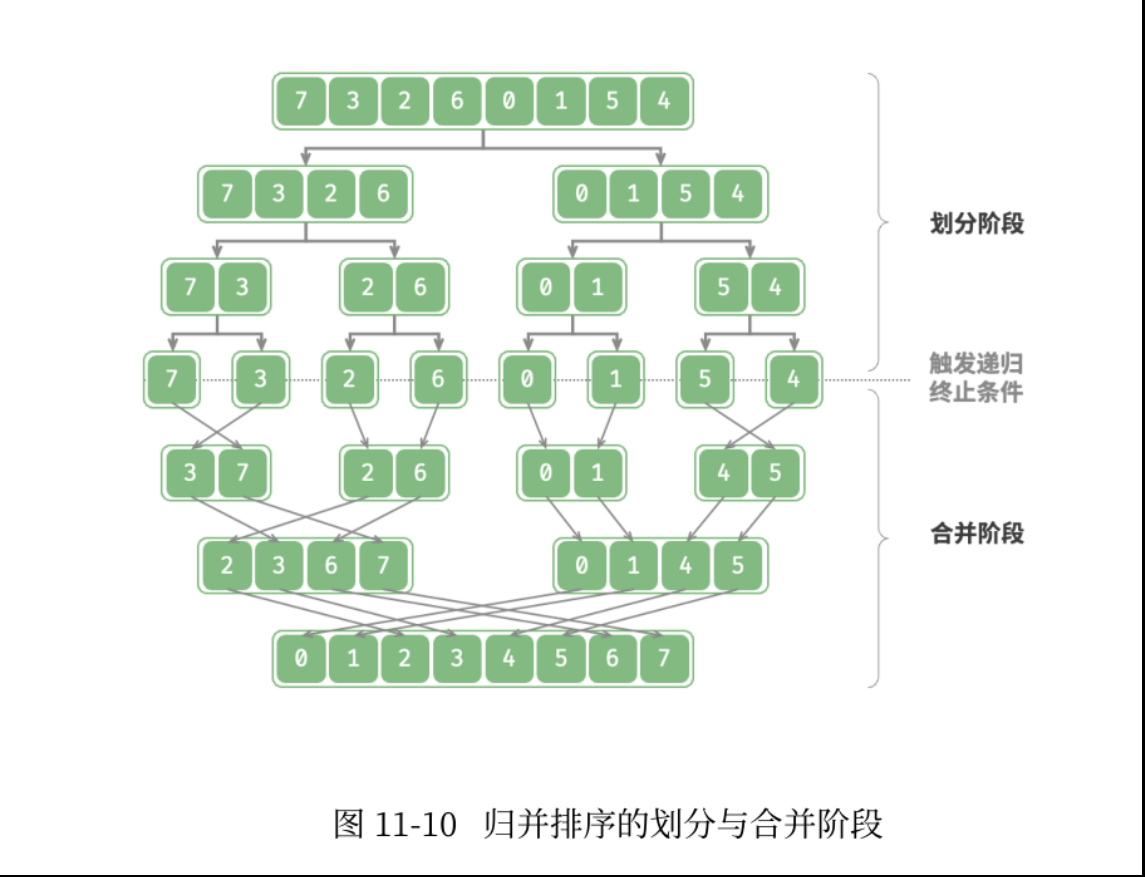

In [3]:

def _findMid(head):
    "划分阶段"

    slow ,fast = head, head.next
    # 空指针有没有访问next
    # 偶数个数，fast会走偶数个数/2
    # slow也走 偶数个数/2，这是不对的
    # 改正slow ,fast = head, head.next
    while fast is not None and fast.next is not None:
        
        slow = slow.next
        fast = fast.next.next
    
    return slow

def _merge(list1, list2):
    "这不就是合并两个有序链表嘛"
    tail = dummy = ListNode()
    while list1 is not None and list2 is not None:
        if list1.val < list2.val:
            tail.next = list1
            list1 = list1.next
            
        else:
            tail.next = list2
            list2 = list2.next
        tail = tail.next
    tail.next = list2 if list1 is None else list2
    return dummy.next
def sortList(head):
    "递归终止条件"
    if head is None or head.next is None:
        return head
    mid = _findMid(head)
    tail = mid.next
    mid.next = None
    
    # 分治法
    list1 = sortList(head)
    list2 = sortList(mid)
    # 合并结果
    return  _merge(list1,list2)

a,b,c = 1,2,3



不是的，a, b, c = 1, 2, 3 在 Python 里是并行赋值（严格来说是“序列解包赋值”）。

执行过程大致是：

先计算右边：构造一个临时元组 (1, 2, 3)。

再解包给左边：把这个元组依次解包到左边的变量。

a = 1

b = 2

c = 3

所以并不是“先给 c 赋值”，而是按照左到右的顺序依次绑定。

In [ ]:
def findMid(head):
    "找到中点"
    slow ,fast = head, head.next
    while fast is not None and fast.next is not None:
        slow = slow.next
        fast = fast.next.next
    return slow

def reverseList(head):
    prev, curr = None, head
    while curr is not None:
        curr.next, prev, curr = prev , curr, curr.next      
    return prev

def mergeTwoLists(list1, list2):
    while list1 is not None and list2 is not None:
        temp = list2.next
        list2.next = list1.next
        list1.next = list2
        list1,list2 = list1.next.next,temp
        

def reorderList(head) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        
        if head is None or head.next is None or head.next.next is None:
            return

        mid = findMid(head)
        right = mid.next
        mid.next = None

        
        h,m = head, right
        m = reverseList(m)
        mergeTwoLists(h, m)
        return 


In [14]:
class solution:
    def _findMid(self,left,right):
        return int(left + (right- left)/2)
    def main(self):
        print(self._findMid(5,6))
midhelper = solution()
midhelper.main()

5


 Floyd 快慢指针找入环点的数学证明  
- 前提
  - 单链表，一个环
  -  
- 引理 1：若存在环，快慢指针必相遇
  - 比在环内相遇，此时一个走了x步，一个走了2x步
  - 假如环的大小是y
  - head 到环入口是L
  - 满足x>=L 要进环
  - slow进环后，第一圈一定会相遇
  - 
- 引理 2：第一次相遇时满足 
  - fast 跑了一圈 
  -  AC = PC


In [ ]:
def hasCycle(head):
    slow = fast = head
    while fast is not None and fast.next is not None:
        slow = slow.next
        fast = fast.next.next
        if slow == fast:
            return True
        
    return False

In [ ]:
def hasCycle(head):
    slow = fast = head
    while fast is not None and fast.next is not None:
        slow = slow.next
        fast = fast.next.next
        if slow == fast:
            slow= head
            while slow != fast:
                slow = slow.next
                fast = fast.next
                
            return slow
        
    return None

Palindrome n,回文  
stack 栈，后入先出

思路：O(1) 空间复杂度的解法需要破坏原链表（找中点 -> 反转后半个list -> 判断回文），在实际应用中往往还需要复原（后半个list再反转一次后拼接），操作比较复杂，利用一个栈存储前半部分，利用栈结构后入先出的性质，这是在回文判断中经常用的


5 / 2   # 2.5   (浮点)  
5 // 2  # 2     (向下取整)  
5 % 2   # 1     (余数)  

In [ ]:
def isPalindrome(head):
    stack = []
    slow = fast = head
    while fast is not None and fast.next is not None:
        stack.append(slow.val)
        slow = slow.next
        fast = fast.next.next
    if fast is not None:
        slow = slow.next
    
    while slow is not None:
        if slow.val != stack.pop():
            return False
        else:
            slow = slow.next
    return True

In [25]:
x = 1211
x = str(x)
x,x[0]

('1211', '1')

In [26]:
len(x) % 2

0

In [ ]:
def isPalindrome(x):
    x = str(x)
    stack1 = []
    slow = fast = 0
    while fast != len(x) and fast+1 != len(x):
        stack1.append(x[slow])
        slow += 1
        fast += 2
    if fast != len(x):
        slow +=1
    while slow != len(x):
        if x[slow] != stack1.pop():
            return False
        slow += 1
    return True
    
    

In [38]:
s = "A man, a plan, a canal: Panama"
s = "".join(ch.lower() for ch in s if ch.isalnum())
s

'amanaplanacanalpanama'

In [40]:
class Node:
    def __init__(self,val,next =None,random=None):
        self.val = int(val)
        self.next = next
        self.random = random

In [ ]:
def copyRandomList(head):
    if head is None:
        return Node
    # 复制结点跟在原结点后面
    curr = head
    while curr is not None:
        curr.next = Node(curr.val,curr.next)
        curr = curr.next.next
    # copy random
    curr = head
    while curr is not None:
        if curr.random is not None:
            curr.next.random = curr.random.next  # 深拷贝的关键
        curr = curr.next.next
    # 分离
    new = head.next
    o,n = head,new
    while n.next is not None:
        o.next = n.next
        n.next = n.next.next
        o = o.next
        n = n.next
        
    n.next = None
    
    return new
    
    
        
        
    
